### INSTRUCTIONS

There are 2 Parts with a total 14 coding tasks in this assignment. 

* Part 1 (Tasks 1.1 through 1.7) Fully Connected Dense Network:
 - You can get started with this part right away.
 - Create and Compile model as instructed. 
 - Ensure you can explain the number of parameters at each layer, as well as total trainable and non-trainable parameters.
 - Also ensure you are connecting the code back to the theory we covered in class.
 
* Part 2 (Tasks 2.1 through 2.7) Convolutional Neural Network:
 - You can get started with this part soon after class on 4/5
 - Create and Compile model as instructed. 
 - Ensure you can explain the number of parameters at each layer, as well as total trainable and non-trainable parameters.
 - Also ensure you are connecting the code back to the theory we covered in class.

First review the code we went over in class Canvas -> Week 4-1 Code -> TensorFlow-DNN - Exercise.ipynb.

Then bookmark and use the keras documentation:
https://www.tensorflow.org/api_docs/python/tf/keras

Then read through the entire framework below once. Note the parts you need to code up.

NOTE: YOU WILL ONLY EDIT TWO CELLS FOR THIS ASSIGNMENT AS PER THE INSTRUCTIONS IN THOSE CELLS.

In [1]:
# !pip install tensorflow

In [2]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# keras API documentation:
# https://www.tensorflow.org/api_docs/python/tf/keras
from tensorflow.keras import datasets # https://www.tensorflow.org/api_docs/python/tf/keras/datasets
from tensorflow.keras import layers # https://www.tensorflow.org/api_docs/python/tf/keras/layers
from tensorflow.keras import activations # https://www.tensorflow.org/api_docs/python/tf/keras/activations
from tensorflow.keras import initializers # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras import losses # https://www.tensorflow.org/api_docs/python/tf/keras/losses
from tensorflow.keras import metrics # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
from tensorflow.keras import optimizers # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras import regularizers # https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
from tensorflow.keras.optimizers import schedules # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules
from tensorflow.keras import callbacks # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
from tensorflow.keras import utils # https://www.tensorflow.org/api_docs/python/tf/keras/utils
from tensorflow.keras import models # https://www.tensorflow.org/api_docs/python/tf/keras/models

In [3]:
##### DO NOT EDIT THIS CELL!!!

# load the MNIST dataset
# - contains 70,000 grayscale images (handwritten digits)
# - images are low resolution (28 by 28 pixels)
# - 10 categories (labeled 0 through 9)
# - 60,000 images in train and 10,000 images in test

mnist = datasets.mnist

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

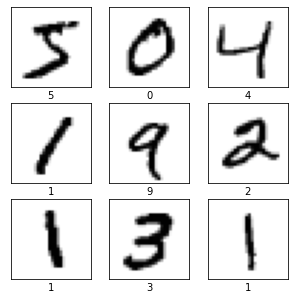

In [4]:
##### DO NOT EDIT THIS CELL!!!

# view a sample of 9 images from the training set
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Part-1: Fully Connected

In [5]:
##### THIS IS CELL 1 (of 2) YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

# CREATE model 
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255),
    
    # Flatten the 2D (28 x 28 x 1) images to be 1D (28 * 28 * 1 = 784)
    tf.keras.layers.Flatten(),
    
    # create Dense hidden layer 1 with 256 nodes (leave everything else at default values),
    layers.Dense(units=256),
    # followed by BatchNormalization (leave everything at default values),
    layers.BatchNormalization(),
    # followed by ReLU Activation (leave everything else at default values)
    layers.Activation(activations.relu),

    # create Dense hidden layer 2 with 128 nodes (leave everything else at default values),
    layers.Dense(units=128),
    # followed by BatchNormalization (leave everything at default values),
    layers.BatchNormalization(),
    # followed by ReLU Activation (leave everything else at default values)
    layers.Activation(activations.relu),
    
    # create Dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    tf.keras.layers.Dense(units=10, activation=activations.softmax)
])

# DISPLAY model architecture
# you should end up with total parameters 236,682  
# ensure you understand the number of parameters in each layer, 
# as well as total number of trainable and non-trainable parameters
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    optimizer=optimizers.Adam(learning_rate=0.001),
    
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    loss='sparse_categorical_crossentropy',
    
    # track accuracy metric
    metrics=['sparse_categorical_accuracy']

)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

In [6]:
%%time

##### DO NOT EDIT THIS CELL!!!

# TRAIN model 
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15
422/422 [==============================] - 5s 9ms/step - loss: 0.4158 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.1150 - val_sparse_categorical_accuracy: 0.9677
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9744 - val_loss: 0.0737 - val_sparse_categorical_accuracy: 0.9800
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0484 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.0829 - val_sparse_categorical_accuracy: 0.9768
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0721 - val_sparse_categorical_accuracy: 0.9797
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0257 - sparse_categorical_accuracy: 0.9928 - val_loss: 0.0813 - val_sparse_categorical_accuracy: 0.9773
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0187 - sparse_categorica

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


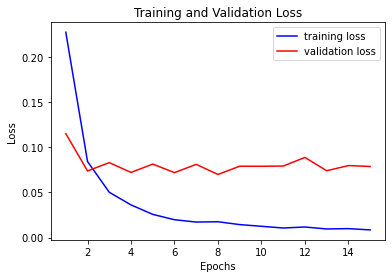

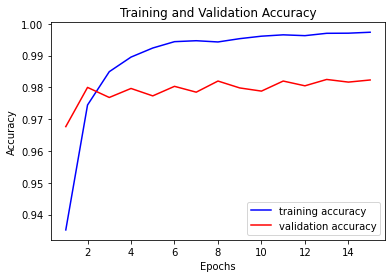

In [7]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.97
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 0s - loss: 0.0770 - sparse_categorical_accuracy: 0.9796

test set loss:  0.077 
test set accuracy:  0.9796


## Part-2: CNN

In [9]:
##### THIS IS CELL 2 (of 2) YOU WILL EDIT PER THE INSTRUCTIONS BELOW

# CREATE model
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255), 
    
    # create 2 pairs of convolutional-pooling layers as below (leave everything else at default values)
    #  - Conv2D: 32 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    #  - Conv2D: 64 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    
#     tf.keras.layers.Conv2D(
#     filters, kernel_size, strides=(1, 1), padding='valid',
#     data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
#     use_bias=True, kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#     bias_constraint=None, **kwargs
# )
    
    
    
    tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu'),
    
# tf.keras.layers.MaxPool2D(
#     pool_size=(2, 2), strides=None, padding='valid', data_format=None,
#     **kwargs
# )

    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='valid', activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    # Flatten to get output ready for fully connected layer (leave everything at default values)
    ### (2.2) YOUR CODE HERE
    
    tf.keras.layers.Flatten(),
    
    # use Dropout with drop rate of 0.5 (leave everything else at default values)
    ### (2.3) YOUR CODE HERE
    
    tf.keras.layers.Dropout(0.5),
    
    # create Dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    ### (2.4) YOUR CODE HERE

    tf.keras.layers.Dense(name='output', units=10, activation=activations.softmax)
    
])

# DISPLAY model architecture
# you should end up with total parameters 34,826  
# ensure you understand the number of parameters in each layer, 
# as well as total number of trainable and non-trainable parameters
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    optimizer=optimizers.Adam(learning_rate=0.001),
    
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    loss='sparse_categorical_crossentropy',
    
    # track accuracy metric
    metrics=['sparse_categorical_accuracy']

)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)             

In [10]:
%%time

##### DO NOT EDIT THIS CELL!!!

# TRAIN model 
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15
422/422 [==============================] - 26s 61ms/step - loss: 0.7501 - sparse_categorical_accuracy: 0.7629 - val_loss: 0.0846 - val_sparse_categorical_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 26s 61ms/step - loss: 0.1270 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.0573 - val_sparse_categorical_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 28s 67ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9720 - val_loss: 0.0538 - val_sparse_categorical_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 26s 63ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.0427 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.0453 - val_sparse_categorical_accuracy: 0.9865
Epoch 6/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0575 - spars

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


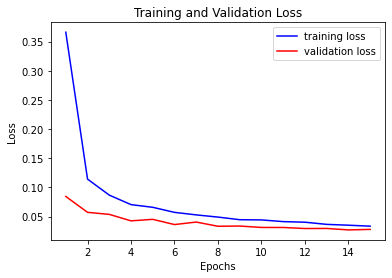

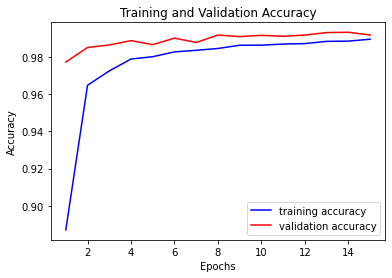

In [12]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.99
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 1s - loss: 0.0254 - sparse_categorical_accuracy: 0.9910

test set loss:  0.0254 
test set accuracy:  0.991
